# Euro-USD Rate

In this proeject, we will create two visuals based on the Euro-USD rate:
- The 2008 Financial Crisis
- The last 3 US presidents  
  
The data set: https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020

## Dataset Preview

In [1]:
import pandas as pd

exchange_rates = pd.read_csv('Desktop/Data/euro-daily-hist_1999_2022.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2024-04-11,1.6448,1.9558,5.4468,1.4688,0.9787,7.7646,NaN,25.392,7.4604,...,4.9713,NaN,11.531,1.4518,NaN,NaN,39.22,34.6336,1.0729,20.1614
1,2024-04-10,1.6399,1.9558,5.433,1.4728,0.981,7.8548,NaN,25.368,7.4594,...,4.9690,NaN,11.4345,1.4605,NaN,NaN,39.536,35.0329,1.086,20.0851
2,2024-04-09,1.6407,1.9558,5.4489,1.4749,0.9819,7.8603,NaN,25.38,7.459,...,4.9682,NaN,11.4555,1.4623,NaN,NaN,39.529,34.9828,1.0867,20.0861
3,2024-04-08,1.6433,1.9558,5.4806,1.4715,0.9807,7.8282,NaN,25.354,7.4588,...,4.9681,NaN,11.4675,1.4607,NaN,NaN,39.769,34.8481,1.0823,20.1574
4,2024-04-05,1.6461,1.9558,5.4633,1.4702,0.9793,7.8421,NaN,25.286,7.459,...,4.9677,NaN,11.526,1.4608,NaN,NaN,39.743,34.6312,1.0841,20.171


In [2]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
6530,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6531,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6532,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6533,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
6534,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6535 entries, 0 to 6534
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6535 non-null   object 
 1   [Australian dollar ]      6535 non-null   object 
 2   [Bulgarian lev ]          6133 non-null   object 
 3   [Brazilian real ]         6267 non-null   object 
 4   [Canadian dollar ]        6535 non-null   object 
 5   [Swiss franc ]            6535 non-null   object 
 6   [Chinese yuan renminbi ]  6267 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6535 non-null   object 
 9   [Danish krone ]           6535 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6535 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6535 non-null   object 
 14  [Croatia

## Data Cleaning

First, let's do the following:
- rename the US dollar and Period\\Unit columns to US_dollar and Time, respectively
- change the Time column data type to datetime
- change the order of rows chronologically

In [4]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True) # Rename the [US dollar ] and Period\Unit: to US_dollar and Time.

exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time']) # Change the Time column to a datetime data type
exchange_rates.sort_values('Time', inplace=True) #Sort the values by Time in ascending order
exchange_rates.reset_index(drop=True, inplace=True) #Reset the index (and drop the initial index)
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


Next, let's create a new variable called euro_to_dollar by isolating the Time and US_dollar columns.

In [5]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy() #Isolate the Time and the US_dollar and assign to a new variable
euro_to_dollar['US_dollar'].value_counts() #Ensure all values are numerical

US_dollar
-         62
1.2276     9
1.0808     8
1.1215     8
1.0867     8
          ..
1.4579     1
1.4607     1
1.4639     1
1.4651     1
1.086      1
Name: count, Length: 3785, dtype: int64

There are 62 counts with the value -. Let's drop these rows.

In [6]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-'] #Drop rows with - values
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float) #Change US_dollar to float type
euro_to_dollar.info() #Check if time and US_dollar have same number of values

<class 'pandas.core.frame.DataFrame'>
Index: 6473 entries, 0 to 6534
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6473 non-null   datetime64[ns]
 1   US_dollar  6473 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 151.7 KB


## Rolling Mean

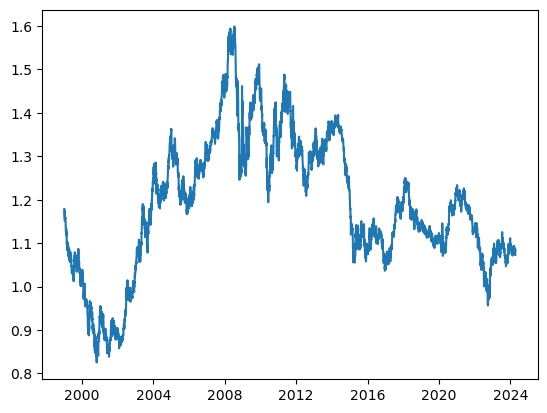

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

Since the rates go up and down everyday, there are many small wiggles — we want to see a smooth line, or long-term trends. We can see a smooth line by using a rolling mean.  
  
Let's check how different rolling means look from a visual perspective.

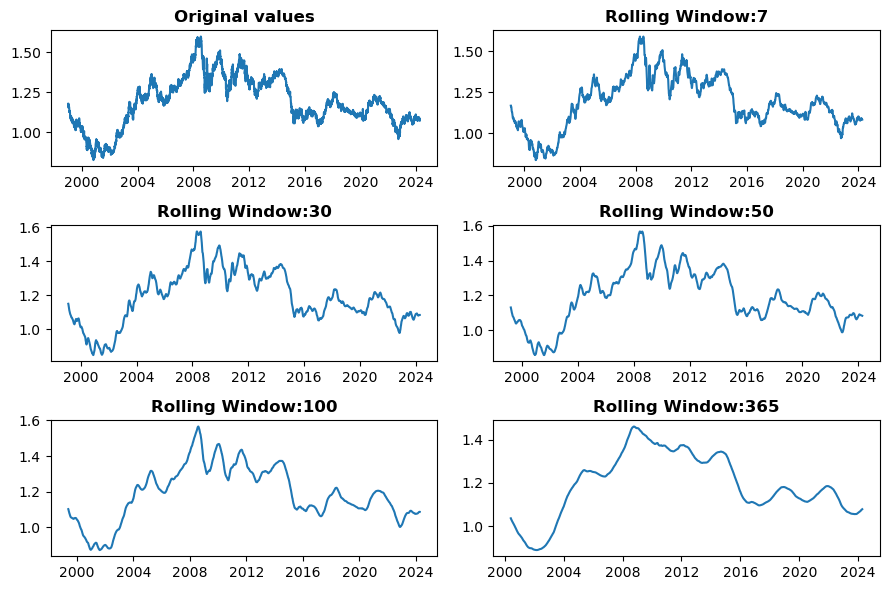

In [8]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

For our graph, let's use the US_dollar column using a moving window of 30 days (30 day moving average).

In [9]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
6530,2024-04-05,1.0841,1.085630
6531,2024-04-08,1.0823,1.085560
6532,2024-04-09,1.0867,1.085670
6533,2024-04-10,1.0860,1.085697


## The 2008 Financial Crisis

In [10]:
financial_crisis = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2006
                   ) & (euro_to_dollar['Time'].dt.year <= 2009)] #Getting the time range for the graph
financial_crisis_7_8 = euro_to_dollar.copy(
                   )[(euro_to_dollar.Time.dt.year >= 2007
                   ) & (euro_to_dollar.Time.dt.year <= 2008)] #Getting the time range for the crisis

In [11]:
financial_crisis.describe()

,Time,US_dollar,rolling_mean
count,1022,1022.000000,1022.000000
mean,2008-01-01 13:17:29.706457856,1.373021,1.369194
min,2006-01-02 00:00:00,1.182600,1.183087
25%,2007-01-02 06:00:00,1.281850,1.280318
50%,2008-01-02 12:00:00,1.358800,1.351828
75%,2009-01-01 12:00:00,1.460475,1.461781
max,2009-12-31 00:00:00,1.599000,1.574333
std,NaN,0.105041,0.104618


Let's find the peak_rate of the US_dollar, then the Time corresponding to it.

In [26]:
peak_rate = financial_crisis['US_dollar'].max()
print('Peak Rate:', peak_rate)
print()
peak_rate_time = financial_crisis.query('US_dollar==1.599000')['Time']
print('Date of Peak Rate:', peak_rate_time)

Peak Rate: 1.599

Date of Peak Rate: 2486   2008-07-15
Name: Time, dtype: datetime64[ns]


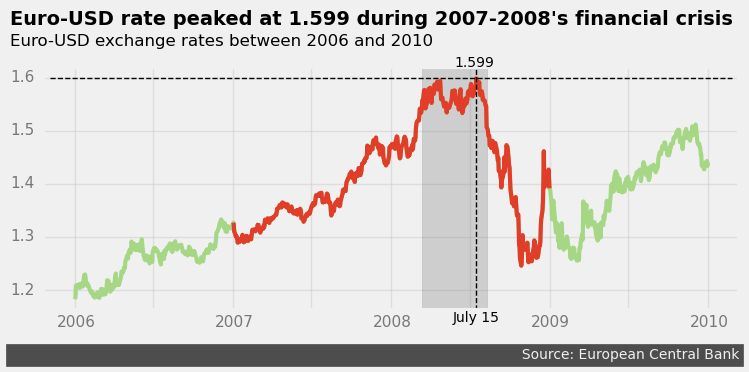

In [94]:
# Adding the FiveThirtyEight style
import matplotlib.style as style
style.use('fivethirtyeight')

# Adding the plot
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(financial_crisis['Time'],
        financial_crisis['US_dollar'],
        linewidth=3, color='#A6D785')

# Highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Time'],
        financial_crisis_7_8['US_dollar'],
        linewidth=3, color='#e23d28')

# Highlihting the peak of the crisis
ax.axvspan(xmin=13950.0, xmax=14100.0, alpha=0.3, color='grey')
    
# Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 13107.0
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.192   
for rate in ['1.2', '1.3', '1.4', '1.5', '1.6']:
    ax.text(13000.0, y, rate, alpha=0.5, fontsize=11)
    y += 0.1
    
# Add horizontal dotted line for peak rate
ax.axhline(y=peak_rate, linestyle='--', linewidth=1, color='black', xmax=.99, xmin=.01)
ax.text(14025.0, 1.62, '1.599', size=10)

# Add verticle dotted line for peak rate date
ax.axvline(x=peak_rate_time, linestyle='--', linewidth=1, color='black')
ax.text(14020.0, 1.14, 'July 15', size=10)

# Adding a title and a subtitle    
ax.text(13000.0, 1.70, "Euro-USD rate peaked at 1.599 during 2007-2008's financial crisis", weight='bold')
ax.text(13000.0, 1.66, 'Euro-USD exchange rates between 2006 and 2010', size=12)

# Adding a signature
ax.text(13000.0, 1.07, ' '*117 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

# Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

## The Last 3 US Presidents

In [14]:
obama_trump_biden = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2009) & (euro_to_dollar['Time'].dt.year < 2025)]
obama = obama_trump_biden.copy(
       )[(obama_trump_biden['Time'].dt.year >= 2009) & (obama_trump_biden['Time'].dt.year < 2017)]
trump = obama_trump_biden.copy(
       )[(obama_trump_biden['Time'].dt.year >= 2017) & (obama_trump_biden['Time'].dt.year < 2021)]
biden = obama_trump_biden.copy(
       )[(obama_trump_biden['Time'].dt.year >= 2021) & (obama_trump_biden['Time'].dt.year < 2025)]

Let's check some basic statistics of obama_trump_biden, specifically the mean.

In [15]:
obama_trump_biden.describe()

,Time,US_dollar,rolling_mean
count,3913,3913.000000,3913.000000
mean,2016-08-21 01:45:59.110657024,1.208399,1.209408
min,2009-01-02 00:00:00,0.956500,0.980033
25%,2012-10-22 00:00:00,1.107500,1.107300
50%,2016-08-22 00:00:00,1.177500,1.178437
75%,2020-06-22 00:00:00,1.315300,1.318070
max,2024-04-11 00:00:00,1.512000,1.492740
std,NaN,0.122193,0.121398


In [16]:
mean_rate = obama_trump_biden['rolling_mean'].mean()
print(mean_rate)

1.2094081744611977


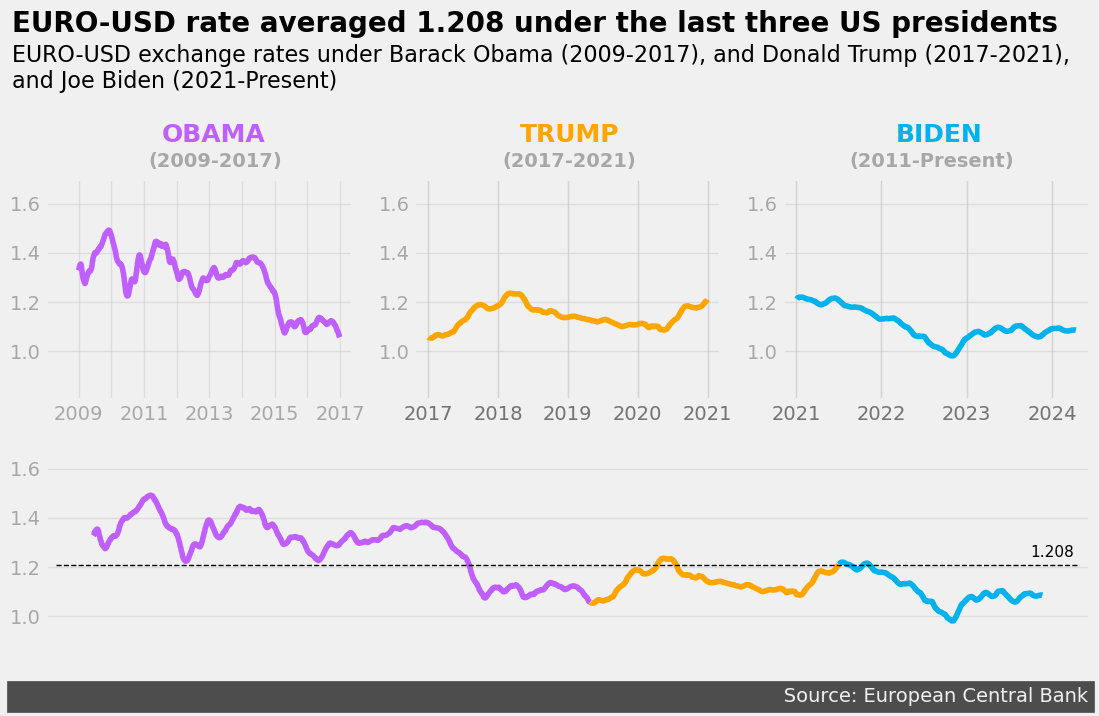

In [97]:
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding and structuring the subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)
    
### Ax1: Obama
ax1.plot(obama['Time'], obama['rolling_mean'], color='#BF5FFF')
ax1.set_xticks(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'])
ax1.set_xticklabels(['', '2009', '', '2011', '', '2013', '', '2015', '', '2017'], 
                    alpha=0.3)
ax1.text(15170.0, 1.85, 'OBAMA', fontsize=18, weight='bold', color='#BF5FFF')
ax1.text(15020.0, 1.75, '(2009-2017)', weight='bold', alpha=0.3)

### Ax2: Trump
ax2.plot(trump['Time'], trump['rolling_mean'], color='#ffa500')
ax2.set_xticks(['2017', '2017', '2018', '2018', '2019', '2019', '2020', '2020', '2021', '2021'])
ax2.set_xticklabels(['', '2017', '', '2018', '', '2019', '', '2020', '', '2021'], 
                    alpha=0.3)
ax2.text(17645.0, 1.85, 'TRUMP', fontsize=18, weight='bold', color='#ffa500')
ax2.text(17553.0, 1.75, '(2017-2021)', weight='bold', alpha=0.3)

### Ax3: Biden
ax3.plot(biden['Time'], biden['rolling_mean'], color='#00B2EE')
ax3.set_xticks(['2021', '2021', '2022', '2022', '2023', '2023', '2024', '2024'])
ax3.set_xticklabels(['', '2021', '', '2022', '', '2023', '','2024'], 
                    alpha=0.3)
ax3.text(19055.0, 1.85, 'BIDEN', fontsize=18, weight='bold', color='#00B2EE')
ax3.text(18854.0, 1.75, '(2011-Present)', weight='bold', alpha=0.3)

### Ax4: Obama-Trump-Biden
ax4.plot(obama['Time'], obama['rolling_mean'], color='#BF5FFF')
ax4.plot(trump['Time'], trump['rolling_mean'], color='#ffa500')
ax4.plot(biden['Time'], biden['rolling_mean'], color='#00B2EE')
ax4.grid(alpha=0.5)
ax4.set_xticks([])

#Add horizontal dotted line for average rate
ax4.axhline(y=mean_rate, linewidth=1, linestyle='--', color='black', xmax=.99, xmin=.01)
ax4.text(19750, 1.24, '1.208', size=11)

### Adding a title and a subtitle
ax1.text(13500.0, 2.30, 'EURO-USD rate averaged 1.208 under the last three US presidents', fontsize=20, weight='bold')
ax1.text(13500.0, 2.07, '''EURO-USD exchange rates under Barack Obama (2009-2017), and Donald Trump (2017-2021),
and Joe Biden (2021-Present)''', 
         fontsize=16)

### Adding a signature
ax4.text(13770.0, 0.65, ' '*126 + 'Source: European Central Bank', color = '#f0f0f0', backgroundcolor = '#4d4d4d', size=14)

plt.show()